In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [7]:
def load_datasets(filename, column_list, target_column): #читає вхідний файл
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df[column_list].values, df[target_column].values
    return X, y

In [8]:
def split_datasets(X, y, test_size = 0.2): #розбиває на 2 датасети
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [9]:
def plot_data(X_train, X_test, y_train, y_test): #Функція для відображення розподілу
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [10]:
def normalize(X): #функція нормалізаації    
    ##################
    # Заповнити змінні
    ##################
    #mean = None
    mean= np.mean(X)
    #std = None
    std=np.std(X)
    #X_new = None
    X_new=(X-mean)/std
    return X_new, mean, std

In [11]:
def prepare_X(X): #формує датасет з рисами, де першою колонкою буде колонка з одиницями
    
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [12]:
def hypothesis(X, theta): #обчислює значення передбачуваної величини
    
    h_thetha=np.dot(X,theta)
    return h_thetha

In [13]:
def cost_function(X, y, theta): # Функція для обчислення штрафної функції
    
    m = X.shape[0]
    if m == 0:
        return None
    
    
    J = (1/(2*m))*np.sum((hypothesis(X, theta) - y)**2)
    return J

In [14]:
def derivative(X, y, theta): #похіднg штрафної функції
    m = X.shape[0]
   
    d_thetha=(1/m)*(np.dot(hypothesis(X,theta)-y,X))
    
    return d_thetha

In [15]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True): #градієнтний спуск для метода лінійної регресії
    
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        delta=alpha*derivative(X,y,theta)
        theta = theta - delta
        J=cost_function(X, y, theta)
        
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [16]:
def plot_J(X, y): #виведення графіка

    theta_0 = np.linspace(-20, 20, 100)
    theta_1 = np.linspace(-5, 10, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [17]:
X, y = load_datasets('burrito.csv', ["population"], "profit")
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97, 1), y=(97,)


In [18]:
y 

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [19]:
test_size = 0.2 #розбиття на частини
X_train, X_test, y_train, y_test = split_datasets(X, y, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77, 1), y=(77,)
Test set: X=(20, 1), y=(20,)


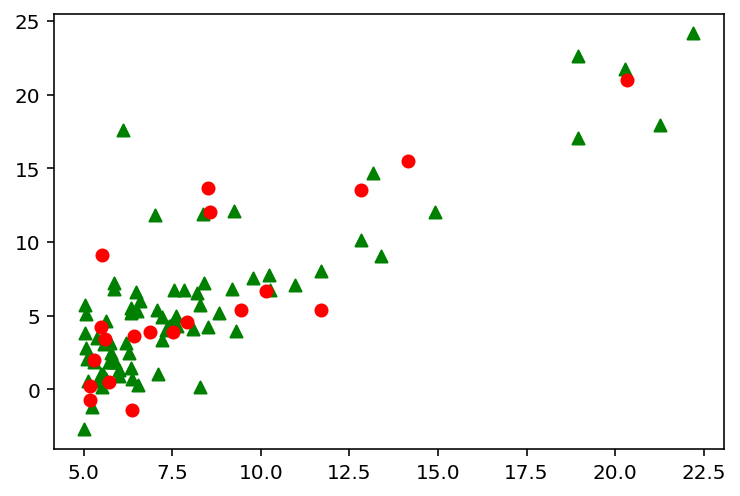

In [20]:
plot_data(X_train, X_test, y_train, y_test) #відображення данних на графіку

In [21]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

In [22]:
y = y_train[:]

In [23]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
30.784435505112334


In [24]:
alpha = 0.01
num_iters = 1500

In [25]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.713684742915237; Theta 1: 4.5269679062828585


/tmp/ipykernel_347/1847600627.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


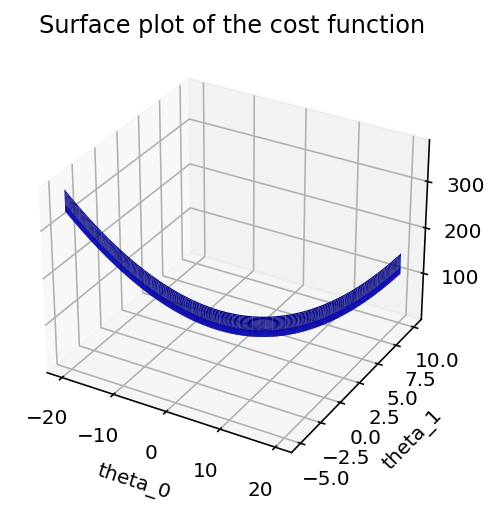

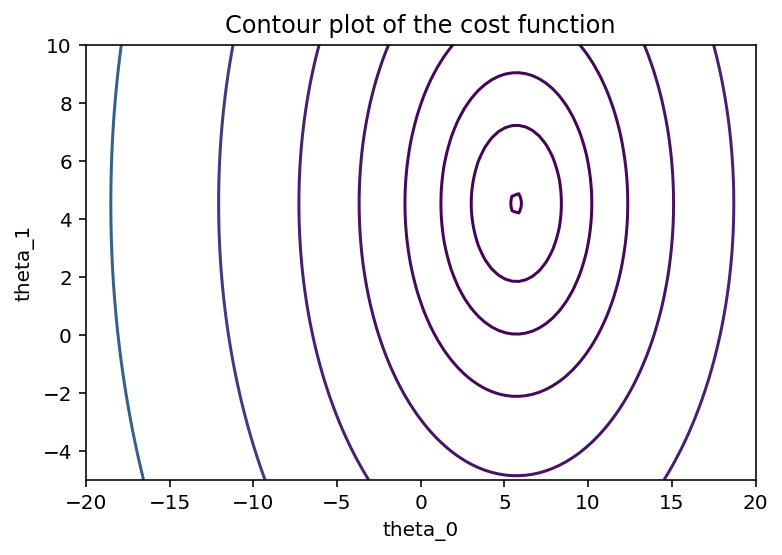

In [26]:
plot_J(X, y)

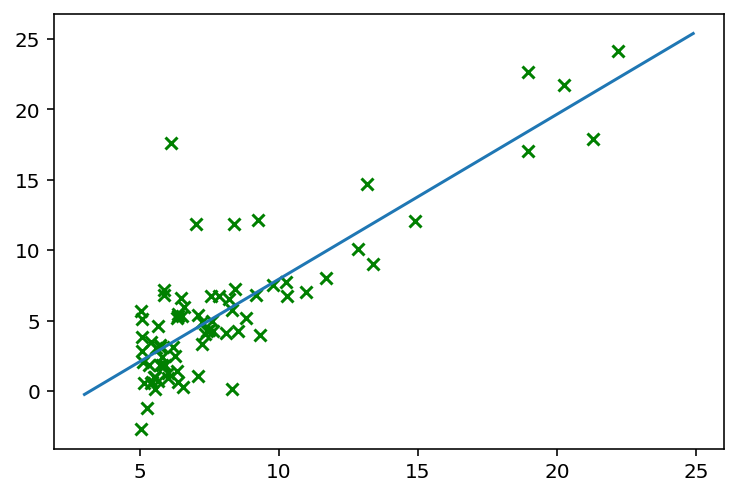

In [27]:
x = np.arange(3, 25, 0.1) #Відображення знайденої апроксимації
h = new_theta[0] + new_theta[1]*(x-mean)/std

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

In [28]:
X_test_proc = (X_test-mean)/std #Оцінка похибки апроксимації на тестових даних
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test.squeeze(), 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print("cost_function: ",cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred          err
0    5.6063   3.39280   2.811680    17.128034
1   14.1640  15.50500  12.827747    17.267033
2    5.1793  -0.74279   2.311913   411.247128
3    7.9334   4.56230   5.535354    21.328155
4    6.8825   3.91150   4.305365    10.069400
5    7.5386   3.88450   5.073274    30.603020
6    6.4296   3.65180   3.775283     3.381436
7   20.3410  20.99200  20.057404     4.452152
8    8.5781  12.00000   6.289921    47.583988
9    5.5277   9.13020   2.719685    70.212204
10   8.5186  13.66200   6.220282    54.470197
11  10.1360   6.67990   8.113312    21.458586
12   5.3054   1.98690   2.459502    23.785896
13  11.7080   5.38540   9.953206    84.818315
14   9.4536   5.41410   7.314620    35.103164
15   5.7292   0.47953   2.955524   516.337692
16   5.4901   4.26300   2.675678    37.234864
17   5.1884   0.20421   2.322563  1037.340641
18  12.8280  13.50100  11.264071    16.568616
19   6.3589  -1.42110   3.692535   359.836388
cost_function:  5.509121167763545
